## Problem
This dataset has 11 different attributes that
decide the quality of red wine.
These attributes include:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Based on these different attributes, we are required to predict the quality of red wine
which is a value between 0 and 10.

**ML Algortihm:** Decision Trees

In [20]:
import pandas as pd
from sklearn import tree, metrics

In [3]:
# Load dataset
df = pd.read_csv("../datasets/winequality-red.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# 1599 rows by 12 columns
df.shape

(1599, 12)

In [11]:
# This dataset, however, consists of only six
# types of quality values. We will thus map all quality values from 0 to 5. 
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {3: 0,
                   4: 1,
                   5: 2,
                   6: 3,
                   7: 4,
                   8: 5}

# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [21]:
# Spliting dataset: train, test

# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# Select top 1000 rows for training
df_train = df.head(1000)

# Select bottom 599 rows for test
df_test = df.tail(599)

In [28]:
# Decision Trees

# Instatiate classifier 
clf = tree.DecisionTreeClassifier(max_depth=3)

# Features for model
cols = list(df.columns[:-1])

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [29]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on training dataset
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculate the accuracy of predictions on training dataset
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [38]:
print("Train accuracy: ", round(train_accuracy,4)*100, " Test accuracy: ", round(test_accuracy,4)*100)

Train accuracy:  57.8  Test accuracy:  54.09


### **Task:** For different values of max_depth parameter plot (max_depth, accuracy) for train and test

In [39]:
import pandas as pd
from sklearn import tree, metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

In [40]:
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

maxi_depth=25
for depth in range(1, maxi_depth):
    
    # Instatiate classifier 
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # Train model
    clf.fit(df_train[cols], df_train.quality)
    
    # generate predictions on the training set
    train_predictions = clf.predict(df_train[cols])

    # generate predictions on the test set
    test_predictions = clf.predict(df_test[cols])

    # calculate the accuracy of predictions on training dataset
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

    # calculate the accuracy of predictions on training dataset
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

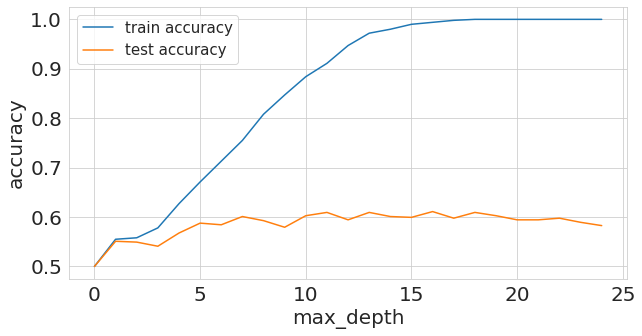

In [41]:
# Plot data
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

**Observations**
We can see that our simple decision tree model keeps learning about the training data better and better
with an increase in max_depth, but the performance on test data does not improve at all. This is called **OVERFITTING**.

The model fits perfectly on the training set and performs poorly when it comes to
the test set. This means that the model will learn the training data well but will not
generalize on unseen samples.

One might argue that this approach isn’t overfitting as the accuracy of the test set
more or less remains the same. Another definition of overfitting would be when the
test loss increases as we keep improving training loss. This is very common when
it comes to neural networks.

Whenever we train a **neural network**, we must monitor loss during the training time
for both training and test set. If we have a very large network for a dataset which is
quite small (i.e. very less number of samples), we will observe that the loss for both
training and test set will decrease as we keep training. However, at some point, test
loss will reach its minima, and after that, it will start increasing even though training
loss decreases further. We must stop training where the validation loss reaches its
minimum value